In [2]:
#import numpy as np
#print("TensorFlow version:", tf.__version__)
import matplotlib.pyplot as plt
import sys
import json
import numpy as np
from dotenv import load_dotenv
#import tensorflow as tf
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
# import temporary directory
import tempfile

In [3]:
load_dotenv("../.env")

True

In [4]:
# create authorization headers
headers = {
    'Authorization': 'Bearer ' + os.getenv("API_SECRET_KEY")
}

df = pd.read_json(r'http://54.236.30.169:4000/api/dataset', storage_options=headers)

In [5]:
# delete unwanted columns
unwanted_columns = ['_id', '_date', '_user', 'bm_HR_max', 'bm_act_steps']          
df_wanted = df.drop(columns=unwanted_columns, axis=1)

# drop rows with missing values
df_wanted = df_wanted.dropna()

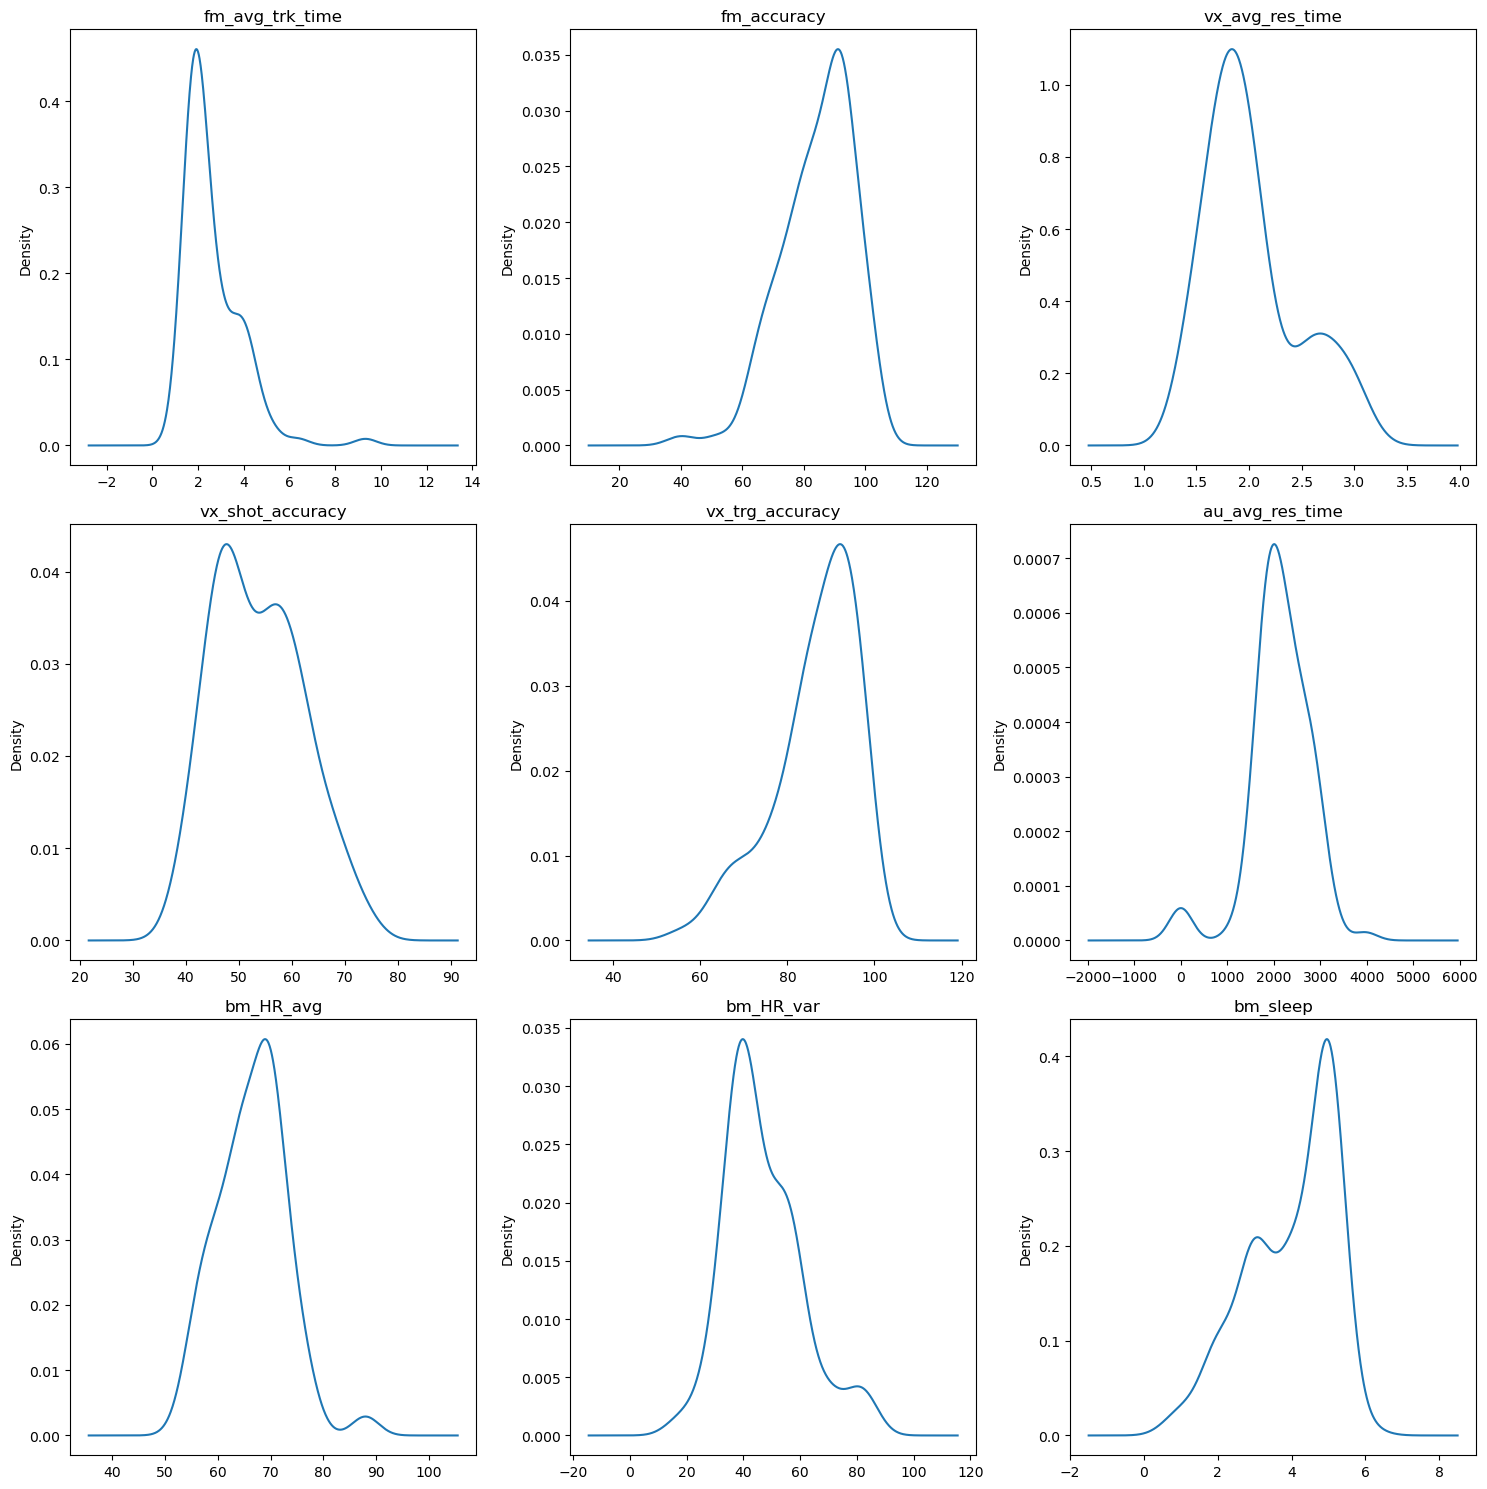

In [6]:
# plot normal distribution curve for each column using subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, column in enumerate(df_wanted.columns):
    ax = plt.subplot(3, 3, i+1)
    df_wanted[column].plot(kind='kde', ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()  
    


([<matplotlib.axis.YTick at 0x2a3b643aed0>,
 [Text(0, 0, 'fm_avg_trk_time'),
  Text(0, 1, 'fm_accuracy'),
  Text(0, 2, 'vx_avg_res_time'),
  Text(0, 3, 'vx_shot_accuracy'),
  Text(0, 4, 'vx_trg_accuracy'),
  Text(0, 5, 'au_avg_res_time'),
  Text(0, 6, 'bm_HR_avg'),
  Text(0, 7, 'bm_HR_var'),
  Text(0, 8, 'bm_sleep')])

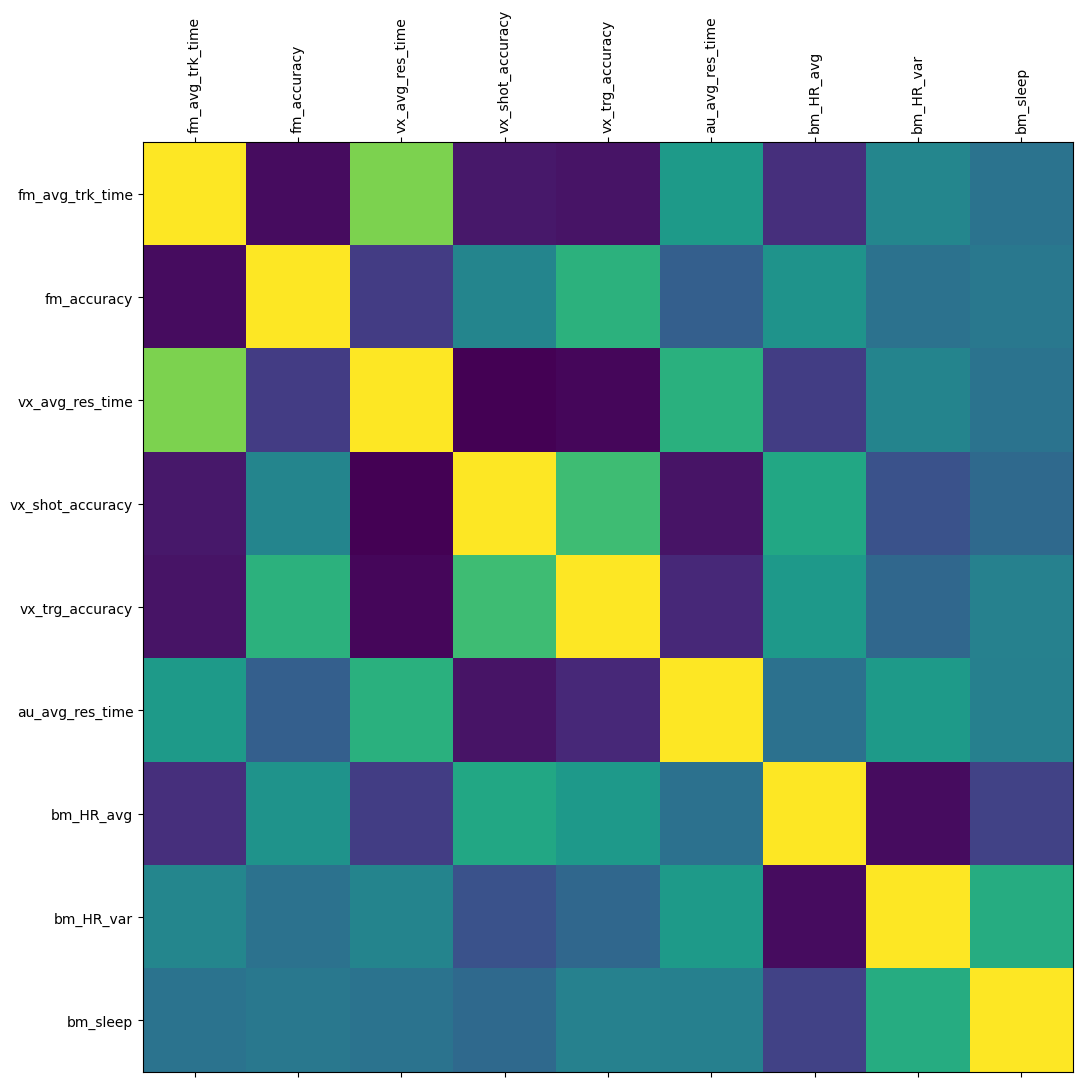

In [7]:
# show correlation matrix
correlation_matrix = df_wanted.corr()
plt.figure(figsize=(12, 12))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

In [8]:
df_independent = df_wanted.iloc[:, -3:]
df_dependent = df_wanted.iloc[:, :-3]

X = df_independent

y = df_dependent

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4217)

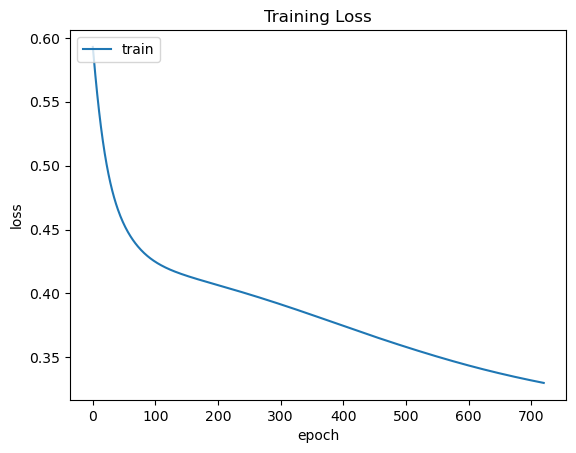

In [9]:
 # create Neural Network model with 3 input and 6 output
model = MLPRegressor(hidden_layer_sizes=(15, 10), activation='tanh', solver='adam', max_iter=1000, verbose=False)

# train model
model.fit(X_train, y_train)

# plot training and validation loss
plt.plot(model.loss_curve_)
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

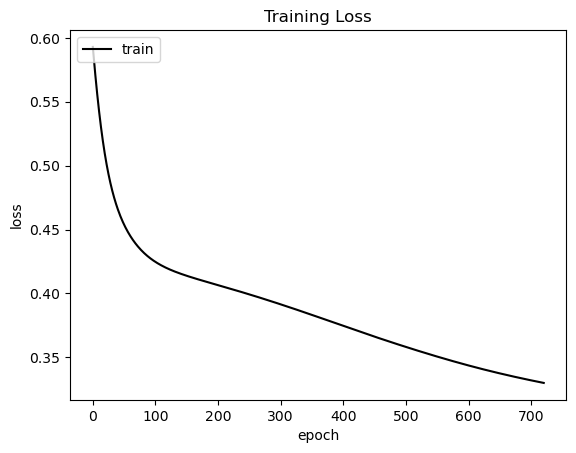

In [17]:
# plot training loss
#plt.figure(figsize=(10, 5))
plt.plot(model.loss_curve_, label='train', color='black')
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

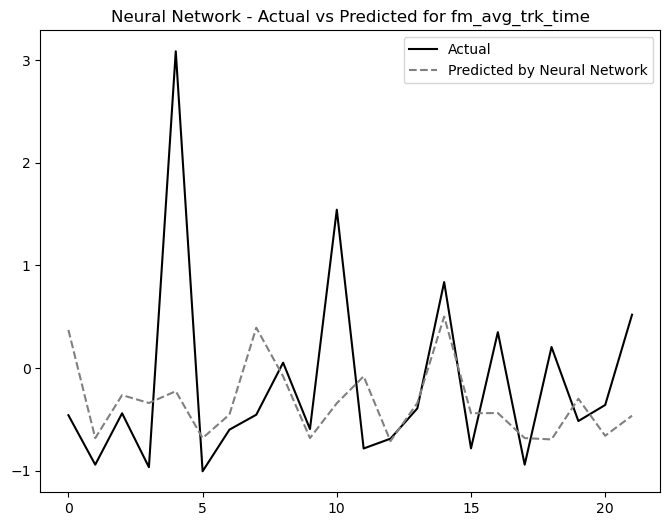

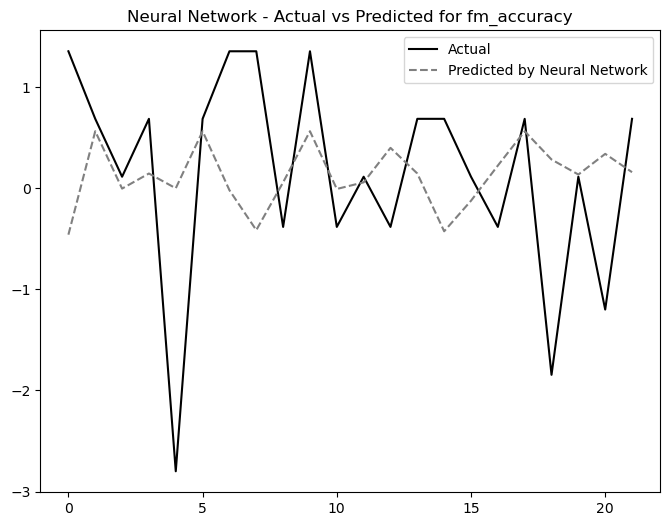

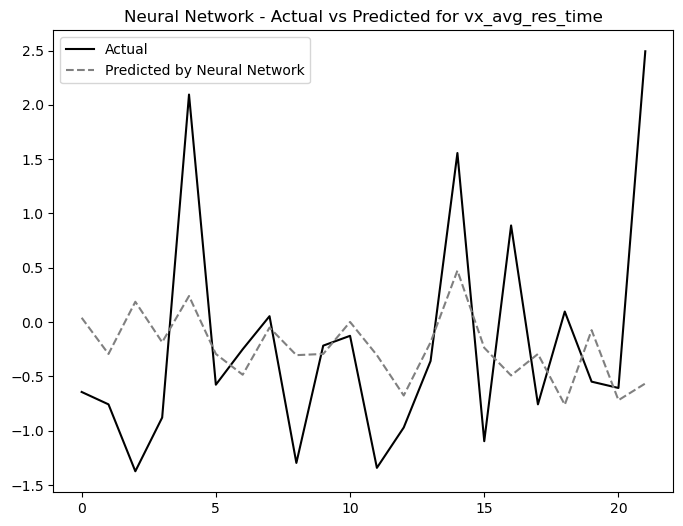

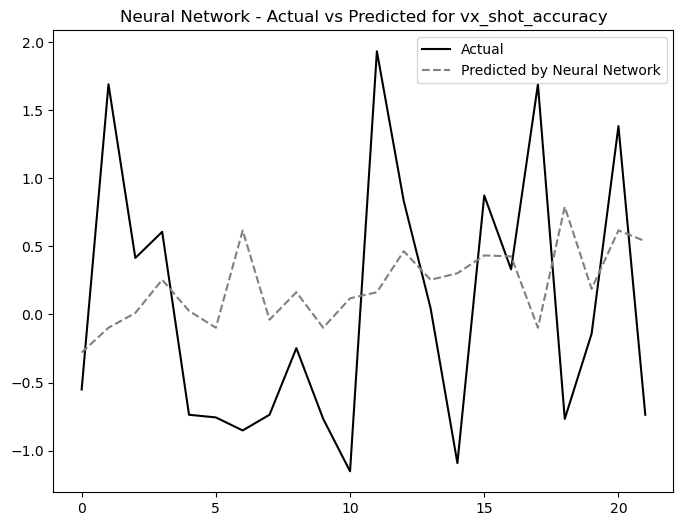

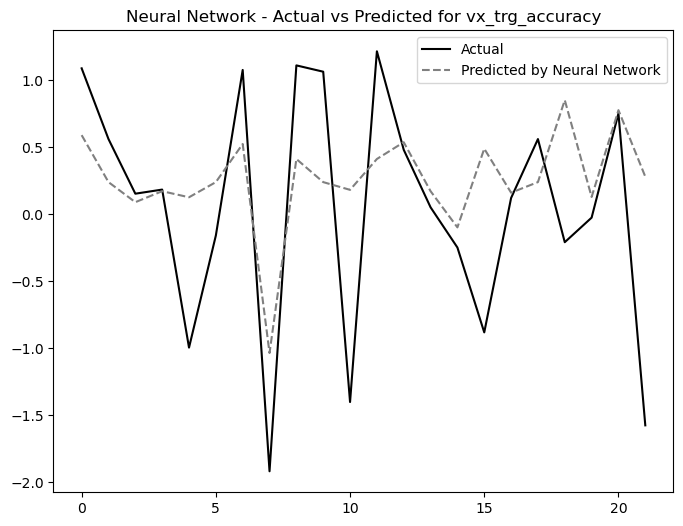

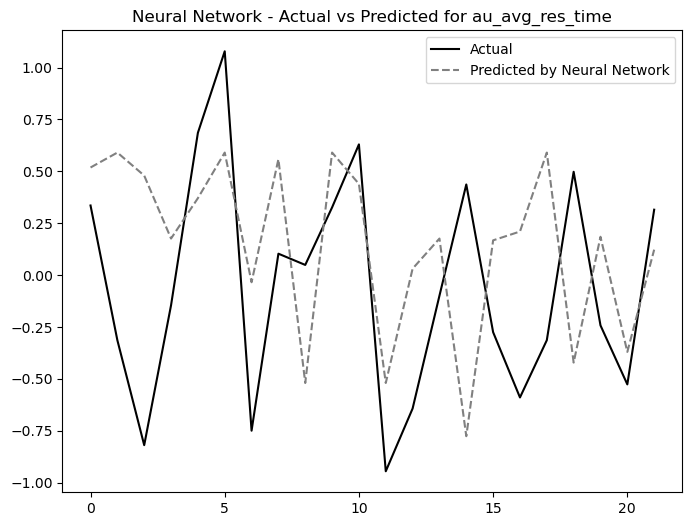

In [22]:
# plot actual vs predicted for each column
for i, column in enumerate(df_dependent.columns):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(y_test[:, i], 'k', label='Actual', linewidth=1.5)  # 'k' is for black
    ax.plot(y_pred[:, i], color='gray', linestyle='--', label='Predicted by Neural Network', linewidth=1.5)  # color set to gray
    ax.set_title(f'Neural Network - Actual vs Predicted for {column}')
    ax.legend()
    plt.show()

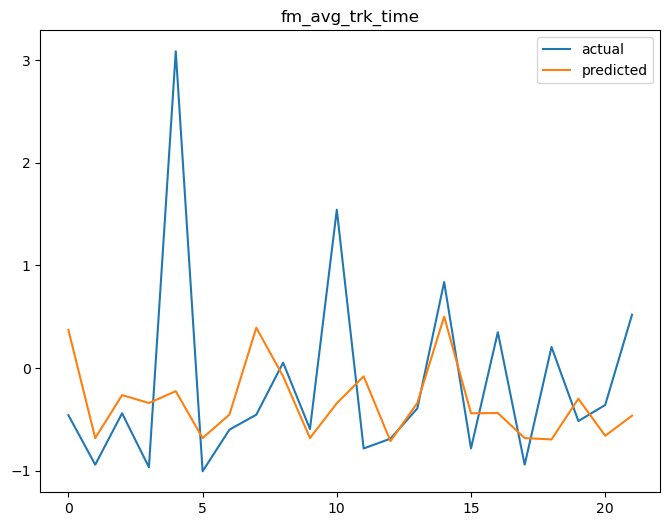

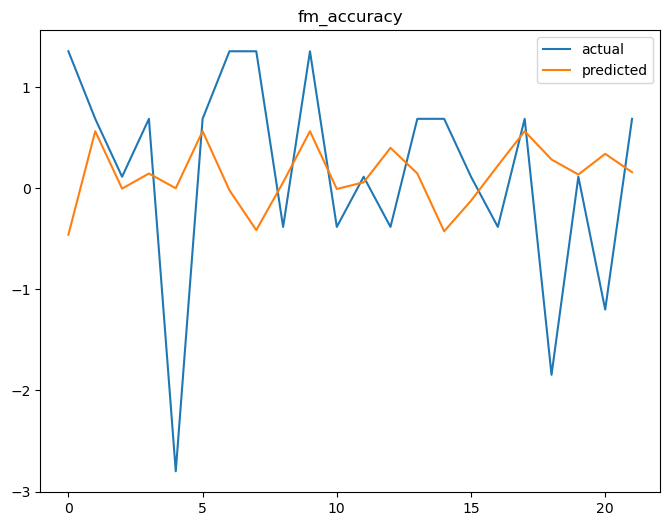

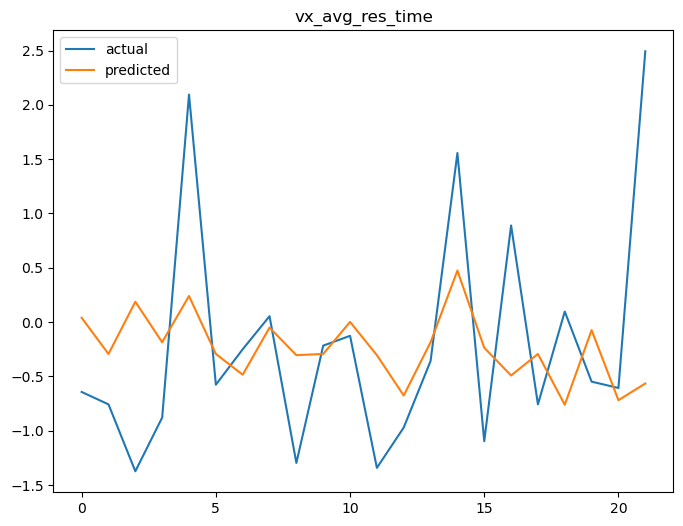

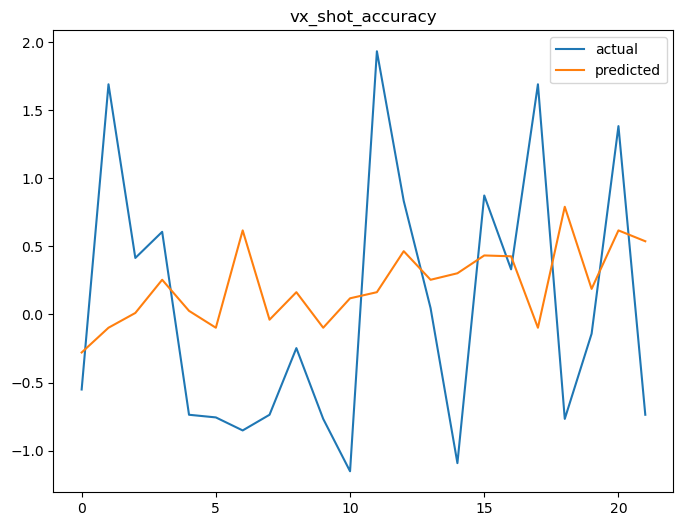

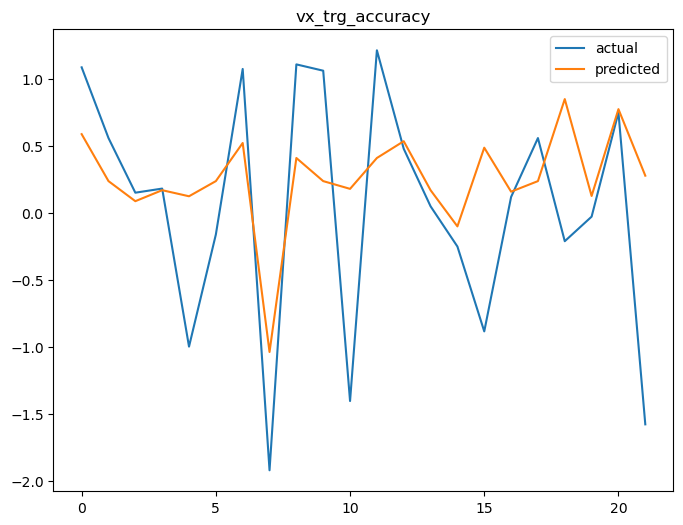

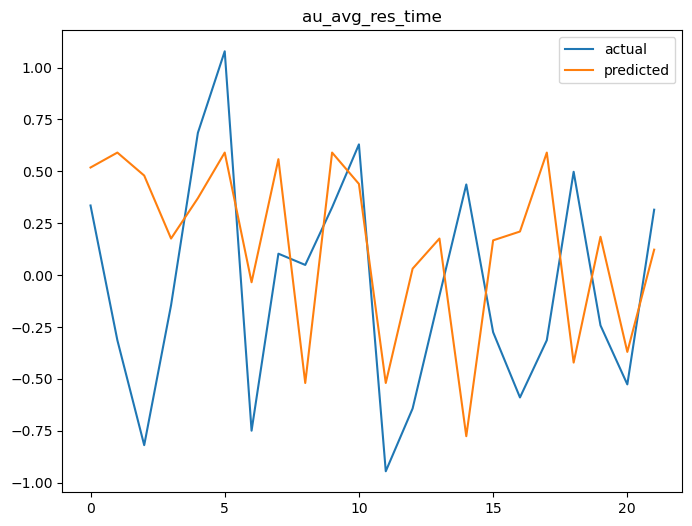

In [14]:
# predict
y_pred = model.predict(X_test)

# plot actual vs predicted for each column
for i, column in enumerate(df_dependent.columns):
    fig, ax = plt.subplots(figsize=(8, 6)) 
    ax.plot(y_test[:, i], label='actual')
    ax.plot(y_pred[:, i], label='predicted')
    ax.set_title(column)
    ax.legend()
    plt.show()



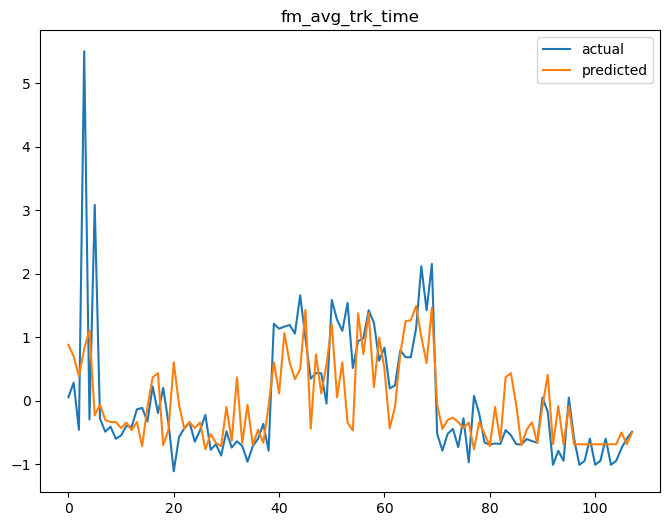

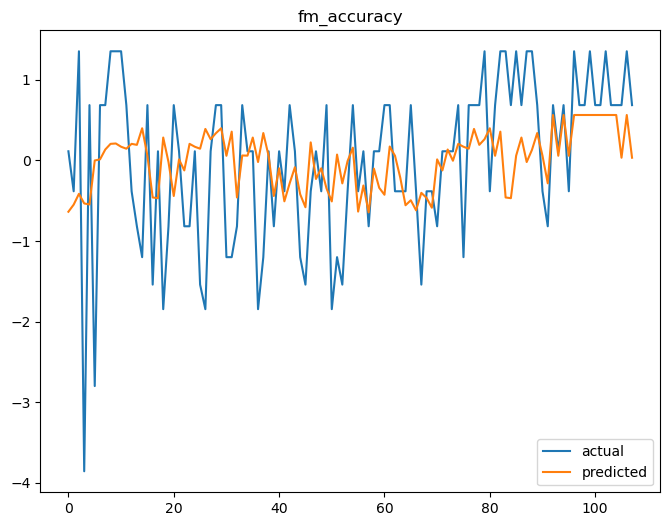

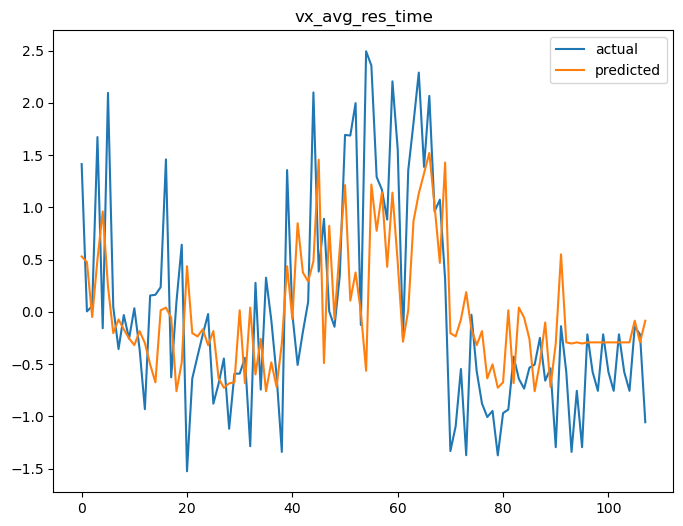

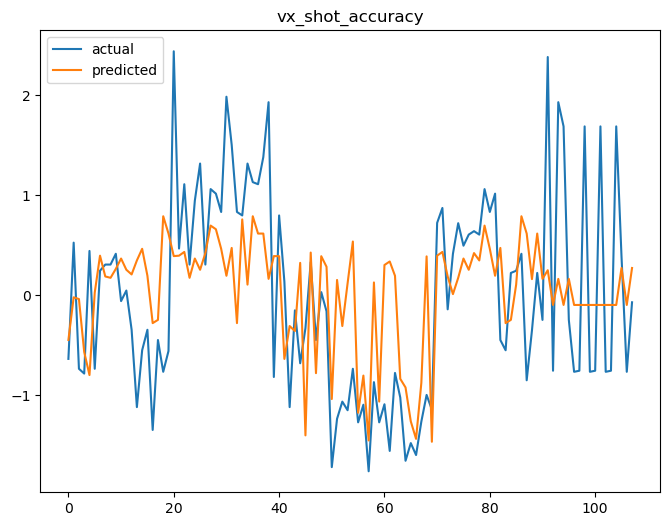

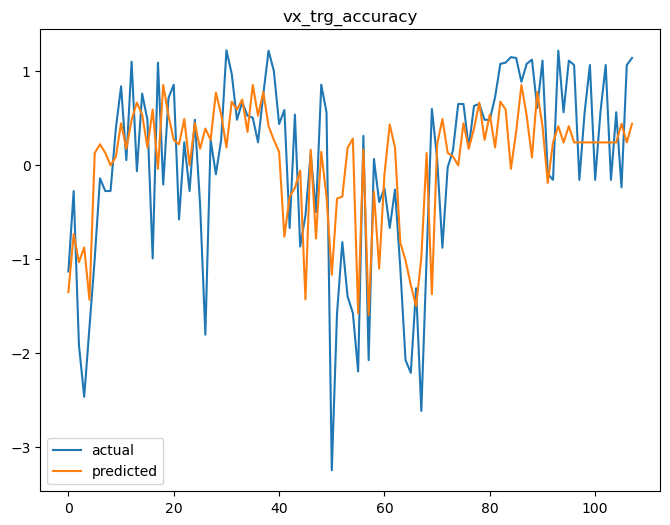

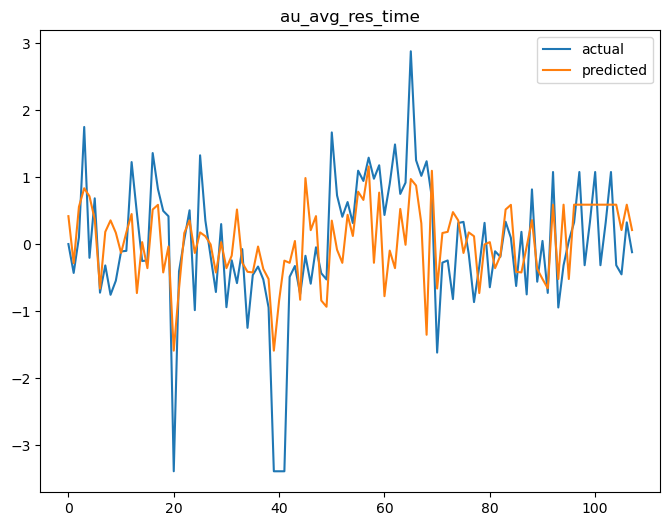

In [15]:
# evaluate prediction for all data
y_pred_all = model.predict(X)

# plot actual vs predicted for each column
for i, column in enumerate(df_dependent.columns):
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed
    ax.plot(y[:, i], label='actual')
    ax.plot(y_pred_all[:, i], label='predicted')
    ax.set_title(column)
    ax.legend()
    plt.show()


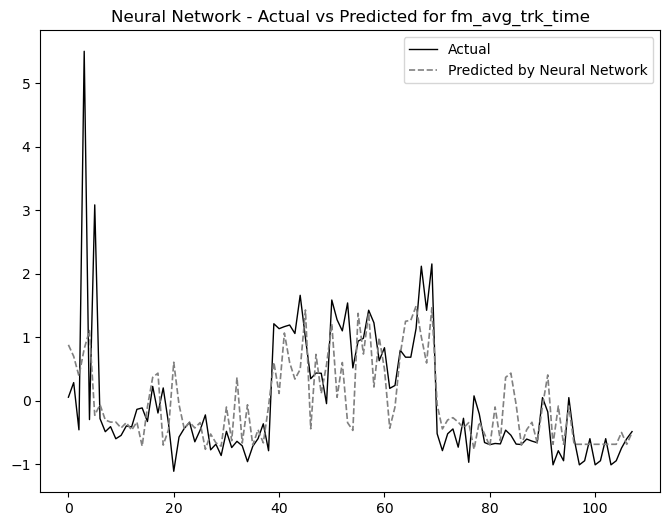

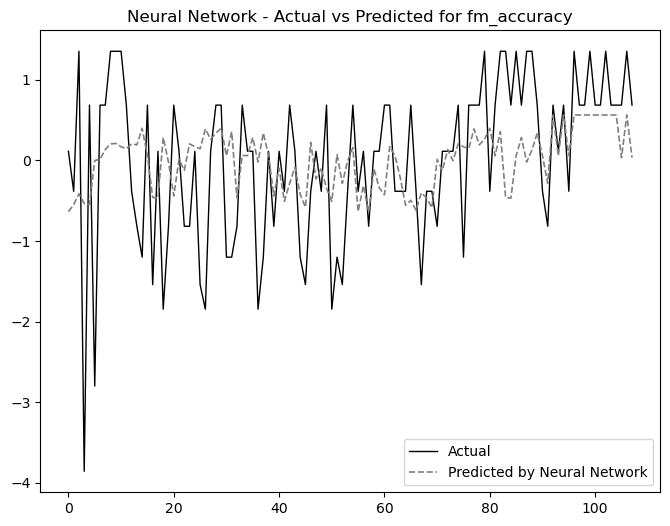

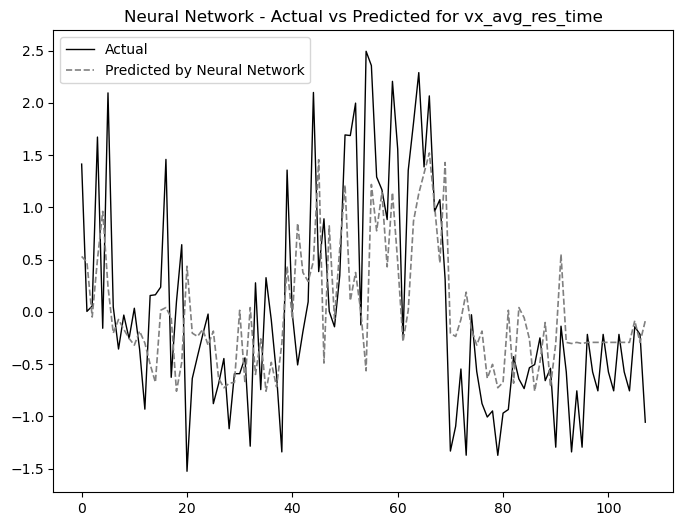

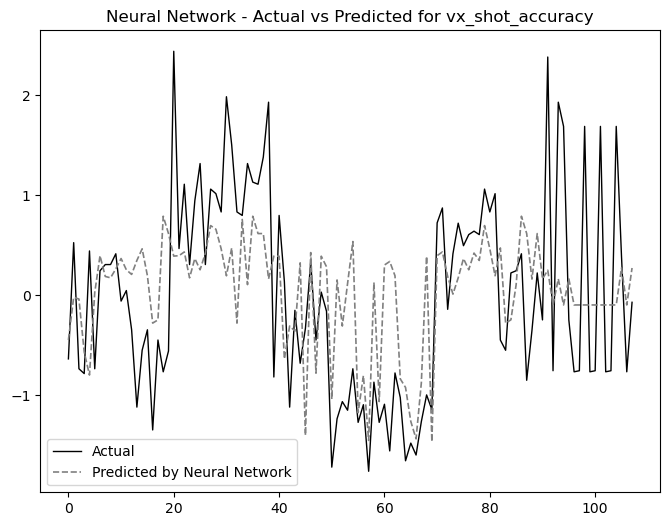

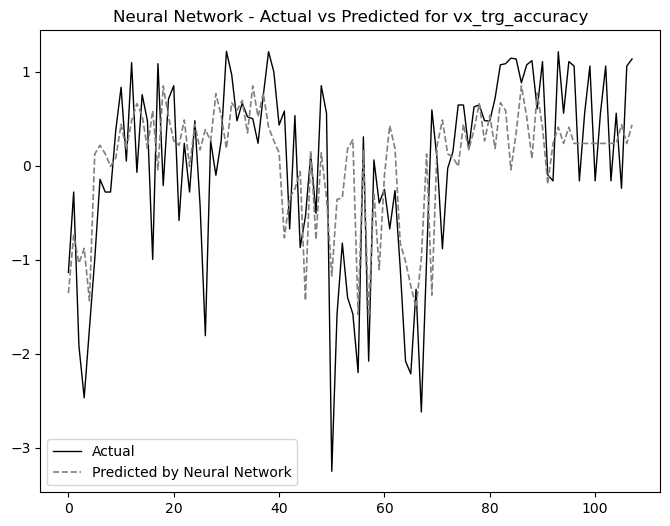

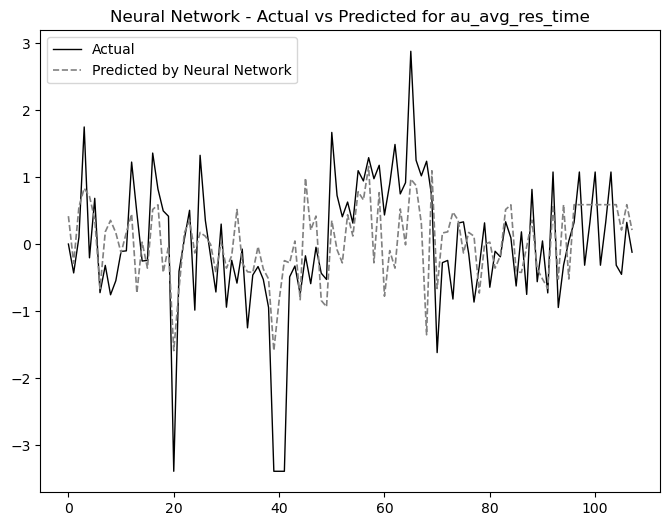

In [26]:
# evaluate prediction for all data
y_pred_all = model.predict(X)

# plot actual vs predicted for each column
for i, column in enumerate(df_dependent.columns):
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed
    ax.plot(y[:, i], 'k', label='Actual', linewidth=1)  # 'k' is for black, actual values
    ax.plot(y_pred_all[:, i], color='gray', linestyle='--', label='Predicted by Neural Network', linewidth=1.2)  # Predicted values in gray
    ax.set_title(f'Neural Network - Actual vs Predicted for {column}')
    ax.legend()
    plt.show()
